In [50]:
import requests
import pandas as pd
import json

# retrieve all streamers on chess.com
response = requests.get("https://api.chess.com/pub/streamers").json()

def dictToArray(dict):
    arr = []
    for key in dict:
        value = dict.get(key)
        arr.append(value)
    return arr


rows = []

# fill in stream_df with streamer chess info
for streamer in response["streamers"]:
    username = streamer.get("username")
    streamer_info = requests.get(f"https://api.chess.com/pub/player/{username}/stats").json()
    
    ratings = {
        "username": username
    }
    
    for key in ["chess_rapid", "chess_bullet", "chess_blitz"]:
        if streamer_info.get(key) == None: continue
        ratings[key] = streamer_info[key]["last"]["rating"]

    rows.append(ratings)

streamer_df = pd.DataFrame(rows)
streamer_df.head(5)



,username,chess_rapid,chess_bullet,chess_blitz
0,TheChessTina,1251.0,1266.0,850.0
1,KingSlayerSloan,1668.0,906.0,1351.0
2,HunterWhiz,1166.0,1129.0,809.0
3,Nauniime,1283.0,1497.0,1460.0
4,jacksarkisian,1806.0,1791.0,1900.0


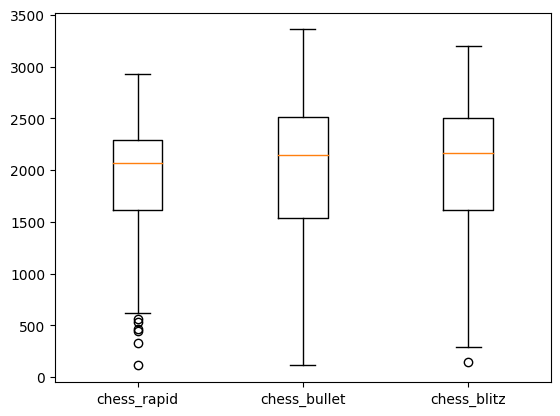

In [95]:
import matplotlib.pyplot as plt
import math

ratings = []
game_types = ["chess_rapid", "chess_bullet", "chess_blitz"]

# plot box plots
for i in range(0, len(game_types)):
    game_type = game_types[i]
    ratings.append([])

    for row in streamer_df.iterrows():
        # 1113/10 = 111.3 + .5 111 * 10 1110
        content = row[1]

        # skip if NaN
        rating = content[game_type]
        if math.isnan(rating): continue
        ratings[i].append(rating)

plt.boxplot(ratings, labels=game_types)
plt.show()


In [103]:
import numpy as np
import json

def get_stats(data):
    return {
        "mean": np.mean(data),
        "std": np.std(data),
        "min_value": np.min(data),
        "max_value":  np.max(data),
        "q1": np.percentile(data, 25),
        "q2": np.percentile(data, 50),
        "q3": np.percentile(data, 75)
    }

i = 0
for data in ratings:
    print(game_types[i] + ':', json.dumps(get_stats(data), indent=2)) 
    i += 1




chess_rapid: {
  "mean": 1941.312020460358,
  "std": 511.47341430261355,
  "min_value": 115.0,
  "max_value": 2928.0,
  "q1": 1610.5,
  "q2": 2070.0,
  "q3": 2293.0
}
chess_bullet: {
  "mean": 2014.5425,
  "std": 690.5031521968237,
  "min_value": 116.0,
  "max_value": 3360.0,
  "q1": 1534.0,
  "q2": 2143.5,
  "q3": 2511.0
}
chess_blitz: {
  "mean": 2031.0873786407767,
  "std": 668.670770380379,
  "min_value": 147.0,
  "max_value": 3202.0,
  "q1": 1611.0,
  "q2": 2165.0,
  "q3": 2505.75
}
